In [9]:
import pandas as pd
import openpyxl
from tkinter import Tk, filedialog 
import requests
from bs4 import BeautifulSoup
import lxml
from datetime import date
from io import StringIO
from selenium import webdriver
from selenium.webdriver.common.keys import Keys                    
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options 
import matplotlib.pyplot as plt

In [10]:
# Open file
filepath = r'C:\Users\redinger\Documents\Jupyter Projects\refDataPull\species_list.xlsx'
df = pd.read_excel(filepath)

# drop Impatiens balfourii
# df = df.drop(df[df['species.id'] == 3811].index)

In [11]:
# add extra group
df['group2'] = df['group'].apply(lambda x: x.split('-')[0])

In [4]:
#driver = webdriver.Chrome()

In [16]:
chrome_options = Options()
chrome_options.add_argument("--headless")

driver = webdriver.Chrome(options = chrome_options)

ref = pd.DataFrame()

for index, row in df.iterrows():
    try: 
        try:
            
            url = 'https://nas.er.usgs.gov/queries/greatlakes/FactSheet.aspx?Species_ID=' + str(row['species.id'])
            driver.get(url)
            reference_link = driver.find_element(By.ID, 'body_ReferenceDBLink')
            reference_link.click()

            soup = BeautifulSoup(driver.page_source, "html.parser")

            table = soup.find('table')

            table_rows = table.find_all('tr')

            data = pd.DataFrame(pd.read_html(StringIO(str(table)))[0])
                        
            data['species.id'] = row['species.id']
            data['scientific.name'] = row['scientific.name']
            data['common.name'] = row['common.name']
            data['status'] = row['status']
            #data['group'] = row['group']
            data['group'] = row['group2']

            ref = pd.concat([ref, data])

        except:
            
            url = 'https://nas.er.usgs.gov/queries/greatlakes/FactSheet.aspx?Species_ID=' + str(row['species.id']) + '&Potential=Y&Type=2&HUCNumber=DGreatLakes'

            driver.get(url)
            reference_link = driver.find_element(By.ID, 'body_ReferenceDBLink')
            reference_link.click()

            soup = BeautifulSoup(driver.page_source, "html.parser")

            table = soup.find('table')

            table_rows = table.find_all('tr')

            data = pd.DataFrame(pd.read_html(StringIO(str(table)))[0])

            data['species.id'] = row['species.id']
            data['scientific.name'] = row['scientific.name']
            data['common.name'] = row['common.name']
            data['status'] = row['status']
            #data['group'] = row['group']
            data['group'] = row['group2']

            ref = pd.concat([ref, data])
            
    except:
        
        data = pd.DataFrame()
        
        data['species.id'] = row['species.id']
        data['scientific.name'] = row['scientific.name']
        data['common.name'] = row['common.name']
        data['status'] = row['status']
        #data['group'] = row['group']
        data['group'] = row['group2']
        data['REF'] = 'NA'
        data['Type'] = 'NA'
        data['Cut-and-Paste Reference'] = 'NA'

        ref = pd.concat([ref, data])
        
driver.close()

In [17]:
ref.columns

Index(['REF', 'Type', 'Cut-and-Paste Reference', 'species.id',
       'scientific.name', 'common.name', 'status', 'group'],
      dtype='object')

In [18]:
ref


,REF,Type,Cut-and-Paste Reference,species.id,scientific.name,common.name,status,group
0,40167,Report,2015. Final Report: South Carolina State Wildl...,3830,Anguillicola crassus,Eel swim bladder parasite,nonindingenous,Nematode
1,41080,Journal Article,"Abdelmonem, A.A., M.M. Metwally, H.S. Hussein,...",3830,Anguillicola crassus,Eel swim bladder parasite,nonindingenous,Nematode
2,23905,Journal Article,"Aieta, A.E., and K. Oliveira. 2009. Distributi...",3830,Anguillicola crassus,Eel swim bladder parasite,nonindingenous,Nematode
3,41061,Journal Article,"Ashworth, S.T., and C.R. Kennedy. 1999. Densit...",3830,Anguillicola crassus,Eel swim bladder parasite,nonindingenous,Nematode
4,41062,Journal Article,"Ashworth, S.T., C.R. Kennedy, and G. Blanc. 19...",3830,Anguillicola crassus,Eel swim bladder parasite,nonindingenous,Nematode
...,...,...,...,...,...,...,...,...
11,36444,Web Page,PIER. 2013. Monochoria hastata. http://www.hea...,3765,Monochoria hastata,Monochoria,watchlist,Plants
12,36445,Web Page,"Scher, J.L., D.S. Walters, and A.J. Redford. 2...",3765,Monochoria hastata,Monochoria,watchlist,Plants
13,37587,Report,"Tagore, J.K., P. Jansirani and S. Soosairaj. 2...",3765,Monochoria hastata,Monochoria,watchlist,Plants
14,36446,Web Page,"Tillery, K. and K.A. Rawlins. 2014. Monochoria...",3765,Monochoria hastata,Monochoria,watchlist,Plants


In [19]:
ref = ref.rename(columns={'REF': 'refnum', 'Type': 'type', 'Cut-and-Paste Reference':'reference'})

In [20]:
ref = ref[['species.id', 'scientific.name', 'common.name', 'status', 'group', 'refnum', 'type', 'reference']]

In [21]:
#
ref.to_excel('glansis_references_' + str(date.today()) + '.xlsx', index = False)

In [8]:
ref

,REF,Type,Cut-and-Paste Reference,status,group,group2,scientific.name,common.name
0,40167,Report,2015. Final Report: South Carolina State Wildl...,nonindingenous,Nematode,Nematode,Anguillicola crassus,Eel swim bladder parasite
1,41080,Journal Article,"Abdelmonem, A.A., M.M. Metwally, H.S. Hussein,...",nonindingenous,Nematode,Nematode,Anguillicola crassus,Eel swim bladder parasite
2,23905,Journal Article,"Aieta, A.E., and K. Oliveira. 2009. Distributi...",nonindingenous,Nematode,Nematode,Anguillicola crassus,Eel swim bladder parasite
3,41061,Journal Article,"Ashworth, S.T., and C.R. Kennedy. 1999. Densit...",nonindingenous,Nematode,Nematode,Anguillicola crassus,Eel swim bladder parasite
4,41062,Journal Article,"Ashworth, S.T., C.R. Kennedy, and G. Blanc. 19...",nonindingenous,Nematode,Nematode,Anguillicola crassus,Eel swim bladder parasite
...,...,...,...,...,...,...,...,...
11,36444,Web Page,PIER. 2013. Monochoria hastata. http://www.hea...,watchlist,Plants,Plants,Monochoria hastata,Monochoria
12,36445,Web Page,"Scher, J.L., D.S. Walters, and A.J. Redford. 2...",watchlist,Plants,Plants,Monochoria hastata,Monochoria
13,37587,Report,"Tagore, J.K., P. Jansirani and S. Soosairaj. 2...",watchlist,Plants,Plants,Monochoria hastata,Monochoria
14,36446,Web Page,"Tillery, K. and K.A. Rawlins. 2014. Monochoria...",watchlist,Plants,Plants,Monochoria hastata,Monochoria


In [38]:
print(len(df['scientific.name'].unique()))
print(len(ref['scientific.name'].unique()))


310
308


In [102]:
ref['scientific.name'].value_counts()

scientific.name
Dreissena polymorpha                    1793
Corbicula fluminea                       774
Myriophyllum spicatum                    758
Cyprinus carpio                          711
Hydrilla verticillata                    701
                                        ... 
Paraleptastacus wilsoni                    1
Paramysis (Serrapalpisis) lacustris        1
Eubosmina maritima                         1
Thalassiosira bramaputrae                  1
Timoniella sp.                             1
Name: count, Length: 308, dtype: int64

In [44]:
freq_table = ref['Type'].value_counts()
freq_table

Type
Journal Article           13145
Report                     3307
Database                   3262
Book                       1429
Web Page                   1354
News                       1131
Other                       828
Book Chapter                513
Conference Proceedings      286
Thesis or Dissertation      220
Website                       4
Name: count, dtype: int64

<Axes: xlabel='Type'>

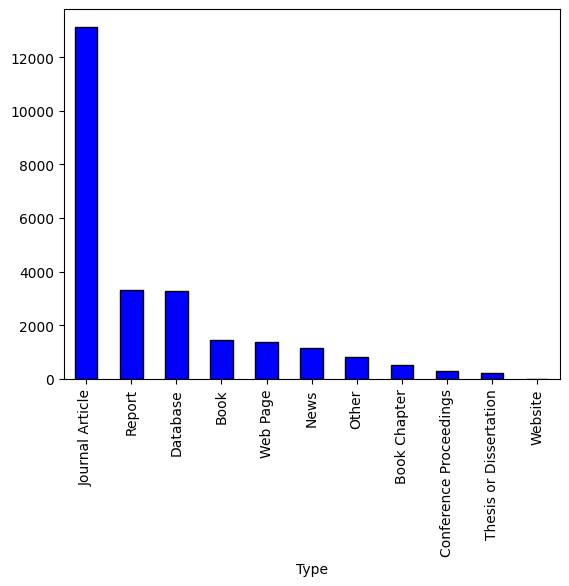

In [41]:
freq_table.plot(kind='bar', color='blue', edgecolor='black')

In [119]:
journal = ref[ref['Type'] == 'Journal Article']
journal = journal.drop_duplicates(subset=['REF'], keep='first')
journal

,REF,Type,Cut-and-Paste Reference,status,group,group2,scientific.name,common.name
1,41080,Journal Article,"Abdelmonem, A.A., M.M. Metwally, H.S. Hussein,...",nonindingenous,Nematode,Nematode,Anguillicola crassus,Eel swim bladder parasite
2,23905,Journal Article,"Aieta, A.E., and K. Oliveira. 2009. Distributi...",nonindingenous,Nematode,Nematode,Anguillicola crassus,Eel swim bladder parasite
3,41061,Journal Article,"Ashworth, S.T., and C.R. Kennedy. 1999. Densit...",nonindingenous,Nematode,Nematode,Anguillicola crassus,Eel swim bladder parasite
4,41062,Journal Article,"Ashworth, S.T., C.R. Kennedy, and G. Blanc. 19...",nonindingenous,Nematode,Nematode,Anguillicola crassus,Eel swim bladder parasite
5,40957,Journal Article,"Audenaert, V., T. Huyse, G. Goemans, C. Belpai...",nonindingenous,Nematode,Nematode,Anguillicola crassus,Eel swim bladder parasite
...,...,...,...,...,...,...,...,...
6,37577,Journal Article,"Kalpani, K.I.U. and D.M.D. Yakandawala. 2018. ...",watchlist,Plants,Plants,Monochoria hastata,Monochoria
8,37583,Journal Article,"Misra, D., M. Mandal, N.N. Ghosh and V. Mandal...",watchlist,Plants,Plants,Monochoria hastata,Monochoria
9,37586,Journal Article,"Misra, D., M. Mandal, N.N. Ghosh and V. Mandal...",watchlist,Plants,Plants,Monochoria hastata,Monochoria
10,36417,Journal Article,"Narayanan, K.B. and I. Kaliappan. 2014. Compar...",watchlist,Plants,Plants,Monochoria hastata,Monochoria


In [120]:
freq_table = pd.DataFrame(journal['group'].value_counts())
freq_table

,count
group,
Fishes,3074
Plants,2146
Mollusks-Bivalves,1464
Crustaceans-Crayfish,543
Algae,471
Crustaceans-Copepods,342
Mollusks-Gastropods,303
Crustaceans-Amphipods,274
Reptiles-Turtles,235


<Axes: xlabel='group'>

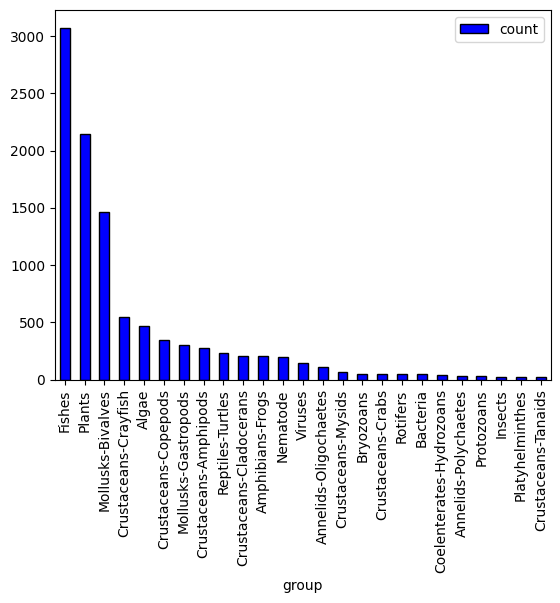

In [121]:
freq_table.plot(kind='bar', color='blue', edgecolor='black')

In [122]:
freq_table = journal['group2'].value_counts()
freq_table

group2
Fishes             3074
Plants             2146
Mollusks           1767
Crustaceans        1505
Algae               471
Reptiles            235
Amphibians          206
Nematode            201
Viruses             148
Annelids            144
Bryozoans            53
Rotifers             50
Bacteria             47
Coelenterates        41
Protozoans           29
Insects              26
Platyhelminthes      26
Name: count, dtype: int64

<Axes: xlabel='group2'>

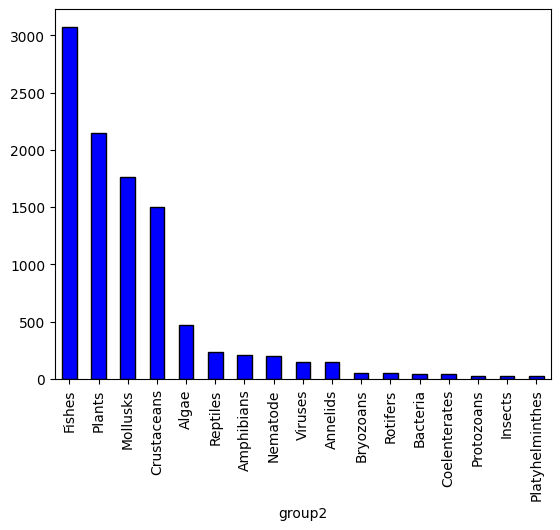

In [123]:
freq_table.plot(kind='bar', color='blue', edgecolor='black')

In [124]:
freq_table = pd.DataFrame(journal['scientific.name'].value_counts())
freq_table

,count
scientific.name,
Dreissena polymorpha,745
Corbicula fluminea,465
Phragmites australis australis,323
Neogobius melanostomus,267
Hypophthalmichthys molitrix,258
...,...
Acineta nitocrae,1
Lepisosteus platostomus,1
Mentha × gracilis,1


(array([91., 49., 49., 28., 21., 11., 10.,  5.,  7.,  1.,  5.,  3.,  2.,
         2.,  3.,  2.,  0.,  1.,  1.,  2.,  2.,  0.,  1.,  0.,  0.,  2.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
        440., 450., 460., 470., 480., 490., 500., 510., 520., 530., 540.,
        550., 560., 570., 580., 590., 600., 610., 620., 630., 640., 650.,
        660., 670., 680., 690., 700., 710., 720., 730., 74

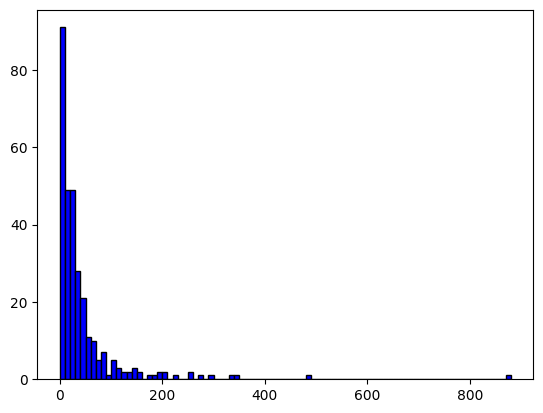

In [125]:
plt.hist(x['count'], bins = 88, range = [0,880], color='blue', edgecolor='black')

In [139]:
x = pd.DataFrame(freq_table[freq_table['count'] > 10])

<Axes: >

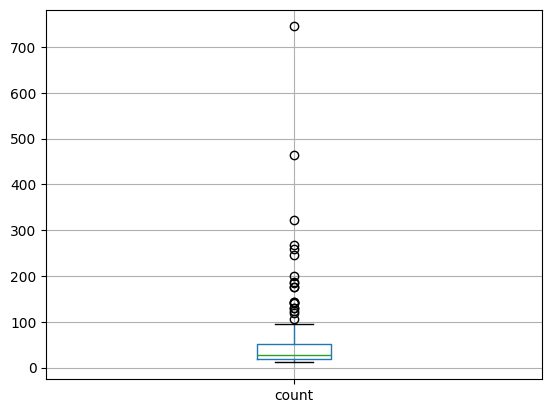

In [140]:
x.boxplot()

In [142]:
x['count'].describe()

count    187.000000
mean      51.716578
std       77.718059
min       11.000000
25%       19.000000
50%       27.000000
75%       52.000000
max      745.000000
Name: count, dtype: float64

In [143]:
x['count'].sum()

9671